# **Automatidata Project**


## **Exploratory Data Analysis**

In this project we will perform the duties of a data professional for the New York City Taxi and Limousine Commission project (New York City TLC). The purpose of this notebook presentation is to  to get a general understanding of what taxi ridership looks like. 

We'll answer questions from the  management team is asking for a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help understand the data. 


One of the introductory points of Data Analysis is the correct questioning to identify Outliers and Biased data. We will follow these protocols to deal with deviant data 
1. Identify any outliers:
    * What methods are best for identifying outliers?
    * Use numpy functions to investigate the `mean()` and `median()` of the data and understand range of data values
    * Use a boxplot to visualize the distribution of the data
    * Use histograms to visualize the distribution of the data
    * How do you make the decision to keep or exclude outliers from any future models?

2. There are three main options for dealing with outliers: 
    * keeping them as they are, deleting them, or reassigning them. Whether you keep outliers as they are, delete them, or reassign values is a decision that you make taking into account the nature of the outlying data and the assumptions of the model you are building. To help you make the decision, you can start with these general guidelines:

3. Delete them: 
    * If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.

4. Reassign them: 
    * If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.
    * Leave them: For a dataset that you plan to do EDA/Analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.


## Import the Required Packages

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns 

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [7]:
df = pd.read_csv("C:/Users/lost4/OneDrive/Documentos/DATA/projects/Coursera Projects/automatidata/2017_Yellow_Taxi_Trip_Data.csv/2017_Yellow_Taxi_Trip_Data.csv")


### Data Exploration and Cleaning

We will explore the Dataset columns and select the applicable ones for our analysis.


Start by discovering, using head and size. 

In [10]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [11]:
df.size

408582

In [12]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

There is no missing data according to the results from the `info()` function. 

In [15]:
# Sort the data by trip distance from maximum to minimum value

df_sort = df.sort_values(by=['trip_distance'],ascending=False)
df_sort.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
18130,90375786,1,10/26/2017 2:45:01 PM,10/26/2017 4:12:49 PM,1,30.50,1,N,132,220,1,90.50,0.0,0.5,19.85,8.16,0.3,119.31
5792,68023798,2,08/11/2017 2:14:01 PM,08/11/2017 3:17:31 PM,1,30.33,2,N,132,158,1,52.00,0.0,0.5,14.64,5.76,0.3,73.20
15350,77309977,2,09/14/2017 1:44:44 PM,09/14/2017 2:34:29 PM,1,28.23,2,N,13,132,1,52.00,0.0,0.5,4.40,5.76,0.3,62.96
10302,43431843,1,05/15/2017 8:11:34 AM,05/15/2017 9:03:16 AM,1,28.20,2,N,90,132,1,52.00,0.0,0.5,11.71,5.76,0.3,70.27
2592,51094874,2,06/16/2017 6:51:20 PM,06/16/2017 7:41:42 PM,1,27.97,2,N,261,132,2,52.00,4.5,0.5,0.00,5.76,0.3,63.06


In [16]:
# Sort the data by total amount and print the top 20 values
total_amount_sorted = df.sort_values(
    ['total_amount'], ascending=False)['total_amount']
total_amount_sorted.head(20)

8476     1200.29
20312     450.30
13861     258.21
12511     233.74
15474     211.80
6064      179.06
16379     157.06
3582      152.30
11269     151.82
9280      150.30
1928      137.80
10291     131.80
6708      126.00
11608     123.30
908       121.56
7281      120.96
18130     119.31
13621     115.94
13359     111.95
29        111.38
Name: total_amount, dtype: float64

In [17]:
# How many of each payment type are represented in the data?
df['payment_type'].value_counts()

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64

In [18]:
# What is the average tip for trips paid for with credit card?
avg_cc_tip = df[df['payment_type']==1]['tip_amount'].mean()
print('Avg. cc tip:', avg_cc_tip)

# What is the average tip for trips paid for with cash?
avg_cash_tip = df[df['payment_type']==2]['tip_amount'].mean()
print('Avg. cash tip:', avg_cash_tip)

Avg. cc tip: 2.7298001965280054
Avg. cash tip: 0.0


In [19]:
# How many times is each vendor ID represented in the data?
df['VendorID'].value_counts()

VendorID
2    12626
1    10073
Name: count, dtype: int64

In [20]:
# What is the mean total amount for each vendor?
df.groupby(['VendorID']).mean(numeric_only=True)[['total_amount']]

,total_amount
VendorID,
1,16.298119
2,16.320382


In [21]:
# Filter the data for credit card payments only
credit_card = df[df['payment_type']==1]

# Filter the data for passenger count only
credit_card['passenger_count'].value_counts()

passenger_count
1    10977
2     2168
5      775
3      600
6      451
4      267
0       27
Name: count, dtype: int64

In [22]:
# Calculate the average tip amount for each passenger count (credit card payments only)
credit_card.groupby(['passenger_count']).mean(numeric_only=True)[['tip_amount']]

,tip_amount
passenger_count,
0,2.610370
1,2.714681
2,2.829949
3,2.726800
4,2.607753
5,2.762645
6,2.643326


After looking at the dataset, the two variables that are most likely to help build a predictive model for taxi ride fares are total_amount and trip_distance because those variables show a picture of a taxi cab ride.

### Select Visualization Types

To present our data in the best possible way, a bar chart, box plot and scatter plot will be most helpful in your understanding of this data. 

*A box plot will be helpful to determine outliers and where the bulk of the data points reside in terms of `trip_distance`, `duration`, and `total_amount`*

*A scatter plot will be helpful to visualize the trends and patters and outliers of critical variables, such as `trip_distance` and `total_amount`*

*A bar chart will help determine average number of trips per month, weekday, weekend, etc.*

We gonna present our data on a Boxplot to perform a check for outliers on relevant columns such as trip distance and trip duration. Some of the best ways to identify the presence of outliers in data are box plots and histograms. 

In [27]:
# Convert data columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

**trip_distance**

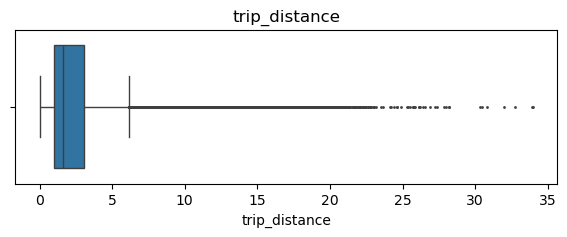

In [29]:
# Create box plot of trip_distance
plt.figure(figsize=(7,2))
plt.title('trip_distance')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1);

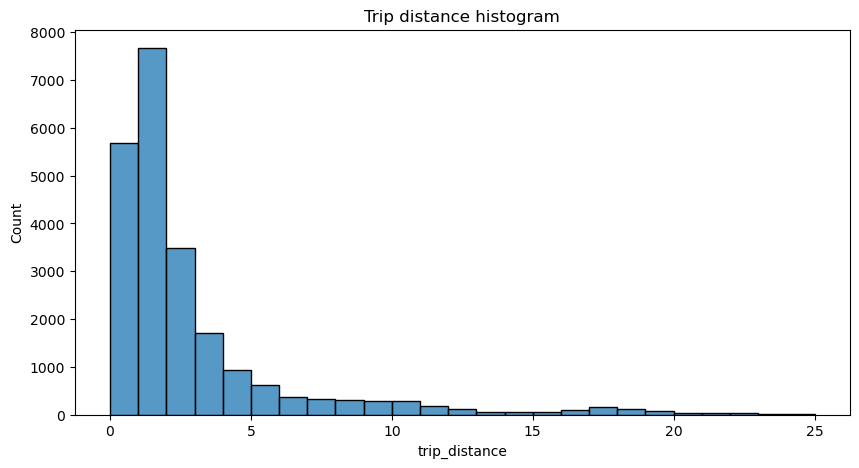

In [30]:
# Create histogram of trip_distance
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('Trip distance histogram');

The majority of trips were journeys of less than two miles. The number of trips falls away steeply as the distance traveled increases beyond two miles.

****total_amount****

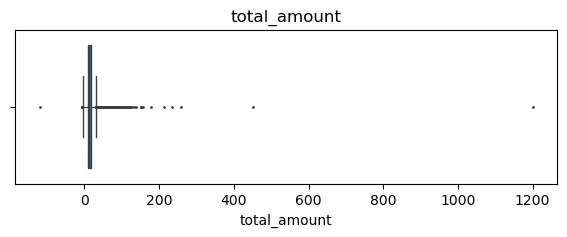

In [33]:
# Create box plot of total_amount
plt.figure(figsize=(7,2))
plt.title('total_amount')
sns.boxplot(x=df['total_amount'], fliersize=1);

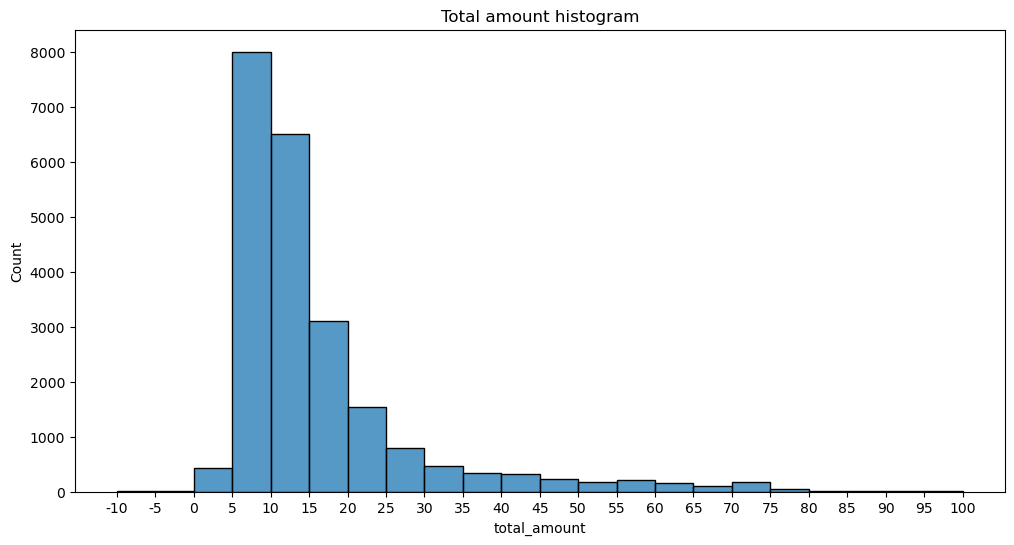

In [34]:
# Create histogram of total_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total amount histogram');

The total cost of each trip also has a distribution that skews right, with most costs falling in the $5-15 range.

**tip_amount**

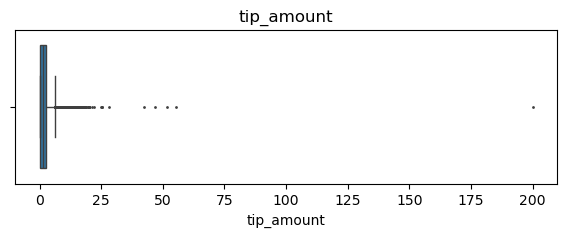

In [37]:
# Create box plot of tip_amount
plt.figure(figsize=(7,2))
plt.title('tip_amount')
sns.boxplot(x=df['tip_amount'], fliersize=1);

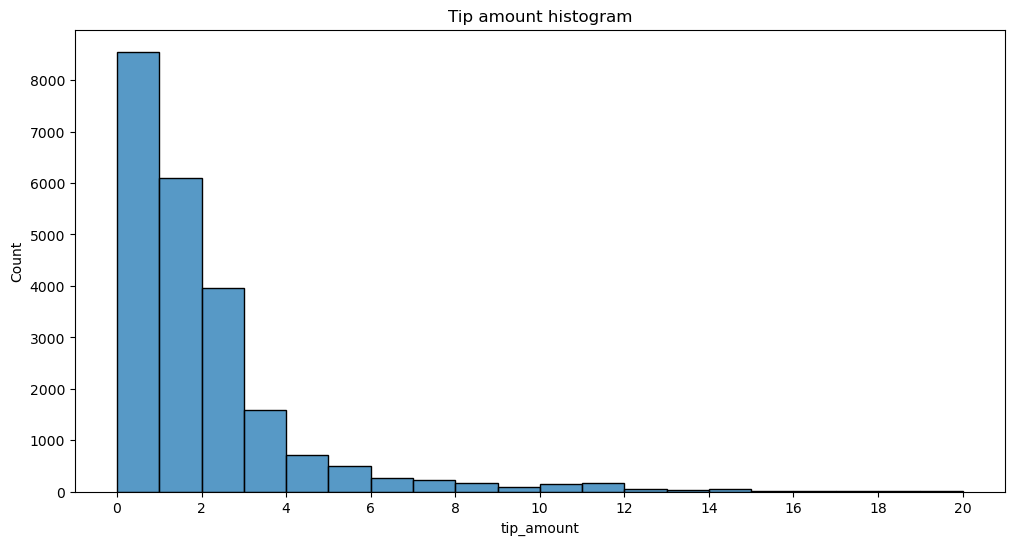

In [38]:
# Create histogram of tip_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');

The distribution for tip amount is right-skewed, with nearly all the tips in the $0-3 range.

**tip_amount by vendor**

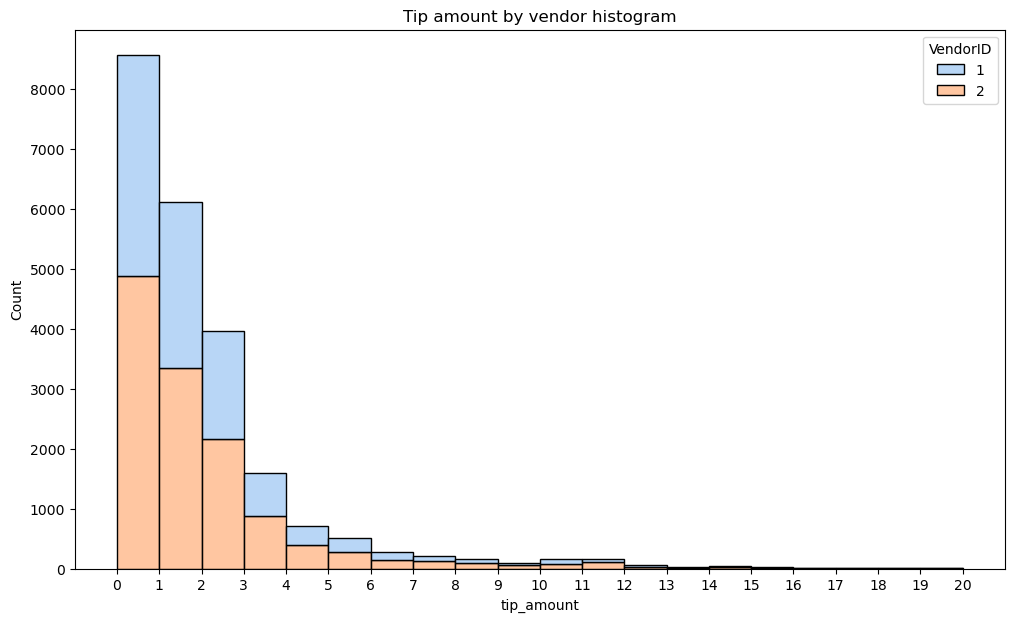

In [41]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained for all tip amounts.

Next, zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

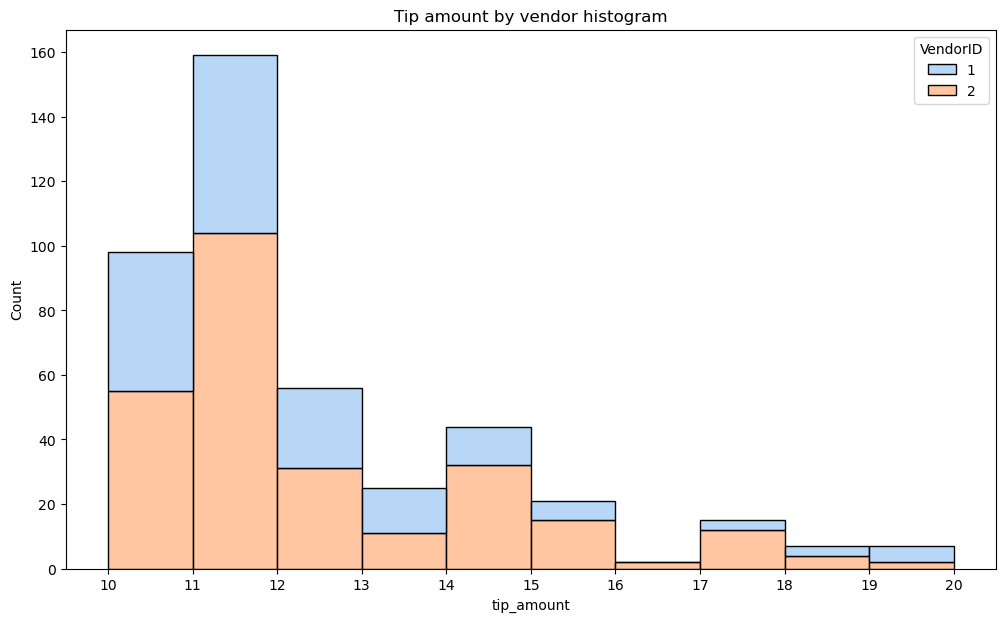

In [43]:
# Create histogram of tip_amount by vendor for tips > $10 
tips_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram');

The proportions are maintained even at these higher tip amounts, with the exception being at highest extremity, but this is not noteworthy due to the low sample size at these tip amounts.

**Mean tips by passenger count**

We gonna examine the unique values in the `passenger_count` column.

In [46]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

Nearly two thirds of the rides were single occupancy, though there were still nearly 700 rides with as many as six passengers. Also, there are 33 rides with an occupancy count of zero, which doesn't make sense. These would likely be dropped unless a reasonable explanation can be found for them.

In [48]:
mean_tips_by_passenger_count = df.groupby(['passenger_count'])['tip_amount'].mean()
mean_tips_by_passenger_count

passenger_count
0    2.135758
1    1.848920
2    1.856378
3    1.716768
4    1.530264
5    1.873185
6    1.720260
Name: tip_amount, dtype: float64

C:\Users\lost4\AppData\Local\Temp\ipykernel_33912\4055688131.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
C:\Users\lost4\AppData\Local\Temp\ipykernel_33912\4055688131.py:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])


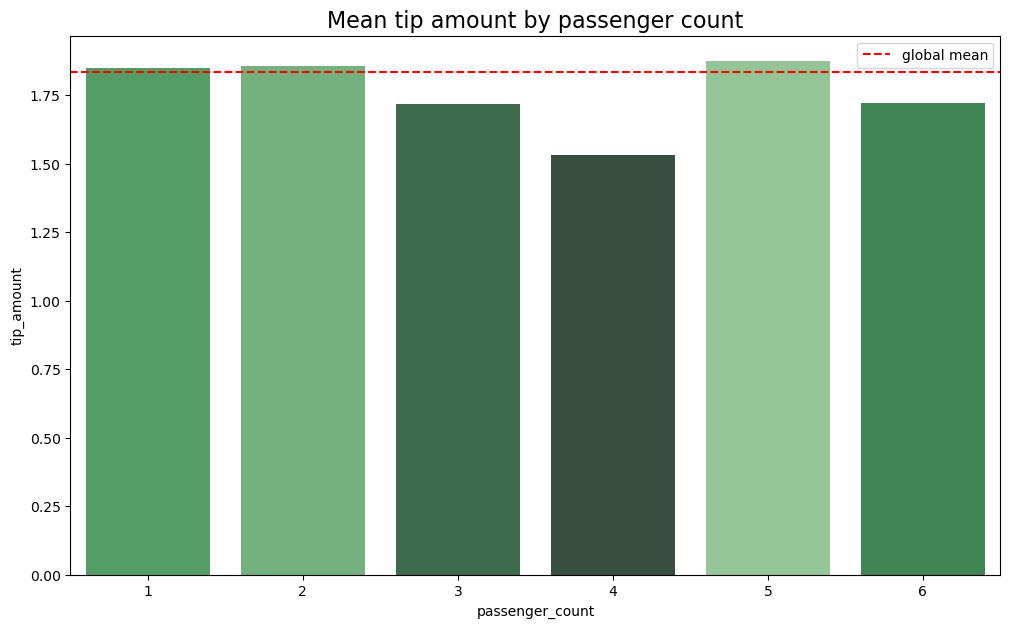

In [49]:
data = mean_tips_by_passenger_count.iloc[1:]  # Ignorando o primeiro elemento se necessário
pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort()

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize=16)
plt.show()


Mean tip amount varies very little by passenger count. Although it does drop noticeably for four-passenger rides, it's expected that there would be a higher degree of fluctuation because rides with four passengers were the least plentiful in the dataset (aside from rides with zero passengers).

**Create Month and Day columns**

In [52]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

**Plot total ride count by month**

Begin by calculating total ride count by month.

In [54]:
# Get total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

**Exemplar note:** The months are out of order.

Reorder the results to put the months in calendar order.

In [56]:
# Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

In [57]:
# Show the index
monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='month')

C:\Users\lost4\AppData\Local\Temp\ipykernel_33912\665060298.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_order)


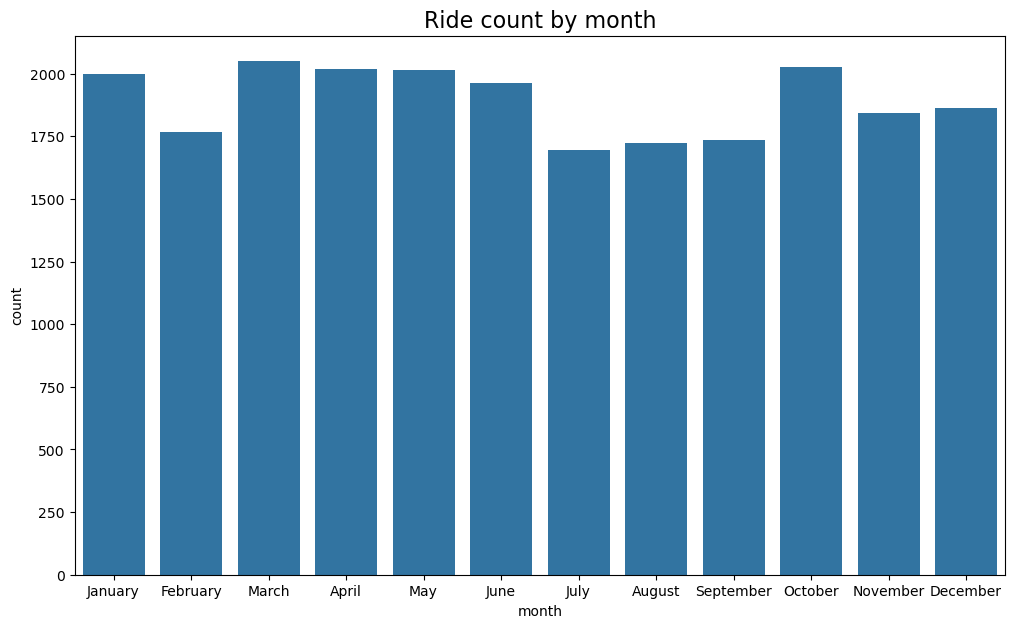

In [58]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize=16);

Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.

**Plot Total Ride count by Day**

Repeat the above process, but now calculate the total rides by day of the week.

In [61]:
# Repeat the above process, this time for rides by day
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

C:\Users\lost4\AppData\Local\Temp\ipykernel_33912\3420538164.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


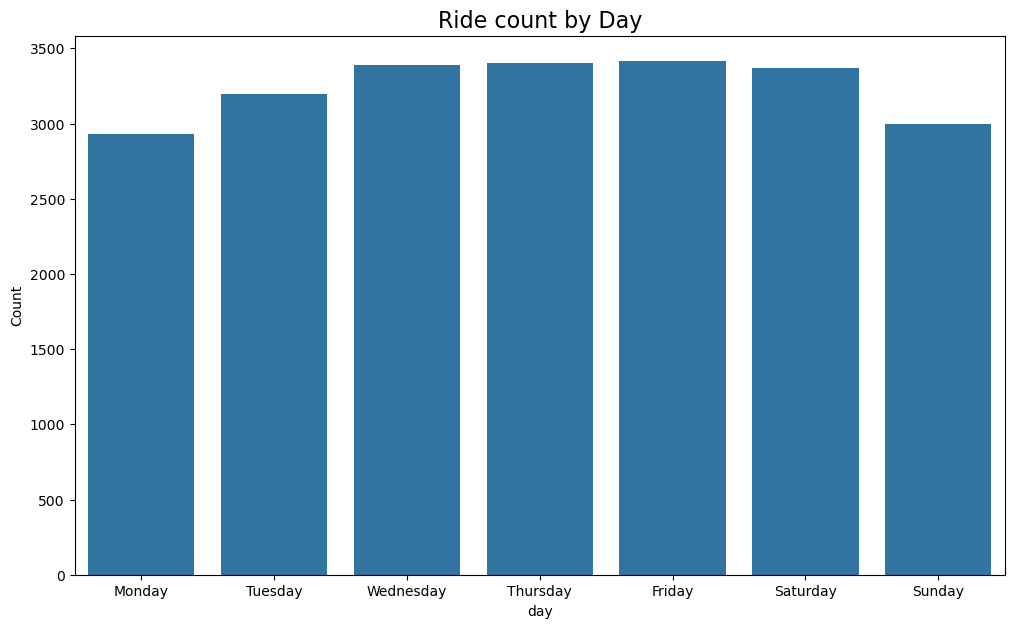

In [62]:
# Create bar plot for ride count by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Ride count by Day', fontsize=16);

This plot presents a characteristic curve related to the cumulative density function of a normal distribution. In other words, it indicates that the drop-off points are relatively evenly distributed over the terrain. This is good to know, because geographic coordinates were not included in this dataset, so there was no obvious way to test for the distibution of locations. 

To confirm this conclusion, consider the following experiment:
1. Create a sample of coordinates from a normal distribution&mdash;in this case 1,500 pairs of points from a normal distribution with a mean of 10 and a standard deviation of 5
2. Calculate the distance between each pair of coordinates 
3. Group the coordinates by endpoint and calculate the mean distance between that endpoint and all other points it was paired with
4. Plot the mean distance for each unique endpoint

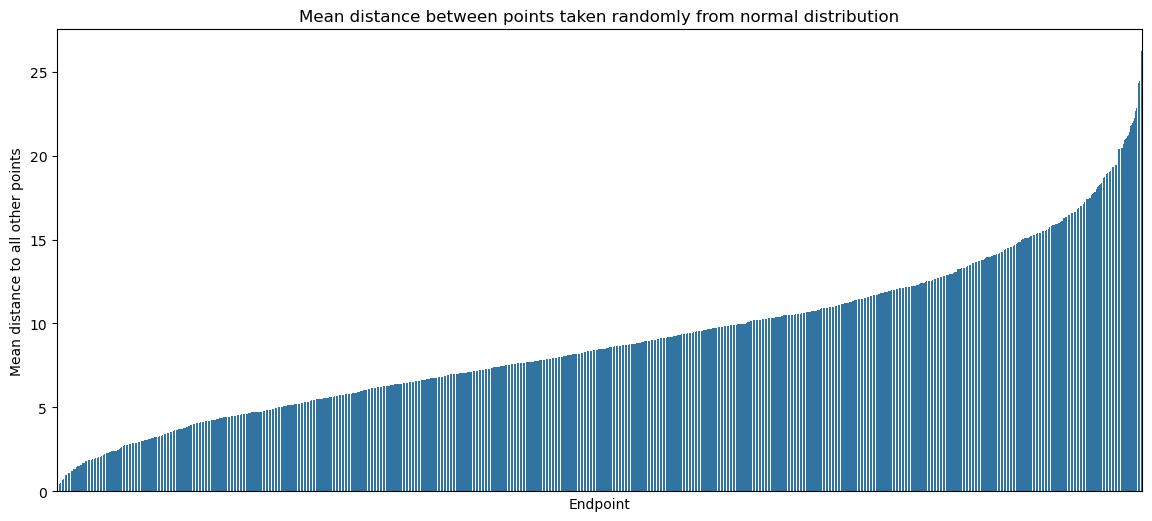

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Generate random points on a 2D plane from a normal distribution
test = np.round(np.random.normal(10, 5, (3000, 2)), 1)
midway = int(len(test) / 2)  # Calculate midpoint of the array of coordinates
start = test[:midway]        # Isolate first half of array ("pick-up locations")
end = test[midway:]          # Isolate second half of array ("drop-off locations")

# 2. Calculate Euclidean distances between points in first half and second half of array
distances = np.sqrt(np.sum((start - end) ** 2, axis=-1))

# 3. Group the coordinates by "drop-off location", compute mean distance
test_df = pd.DataFrame({
    'start': [tuple(x) for x in start.tolist()],
    'end': [tuple(x) for x in end.tolist()],
    'distance': distances
})

# Convert 'end' tuples to strings to avoid MultiIndex issues
test_df['end_str'] = test_df['end'].apply(lambda x: f"{x[0]}, {x[1]}")

# Group by the new 'end_str' column
data = test_df[['end_str', 'distance']].groupby('end_str').mean()
data = data.sort_values(by='distance')

# 4. Plot the mean distance between each endpoint ("drop-off location") and all points it connected to
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=data.index, y=data['distance'], order=data.index)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel('Endpoint')
ax.set_ylabel('Mean distance to all other points')
ax.set_title('Mean distance between points taken randomly from normal distribution')
plt.show()


The curve described by this graph is nearly identical to that of the mean distance traveled by each taxi ride to each drop-off location. This reveals that the drop-off locations in the taxi dataset are evenly distributed geographically. Note, however, that this does *not* mean that there was an even distrubtion of *rides* to each drop-off point. Examine this next.

**Histogram of rides by drop-off location**

First, check whether the drop-off locations IDs are consecutively numbered. For instance, does it go 1, 2, 3, 4..., or are some numbers missing (e.g., 1, 3, 4...). If numbers aren't all consecutive, the histogram will look like some locations have very few or no rides when in reality there's no bar because there's no location. 

There are many ways to do this.

In [68]:
# Check if all drop-off locations are consecutively numbered
df['DOLocationID'].max() - len(set(df['DOLocationID'])) 

49

There are 49 numbers that do not represent a drop-off location. 

To eliminate the spaces in the historgram that these missing numbers would create, sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other. 

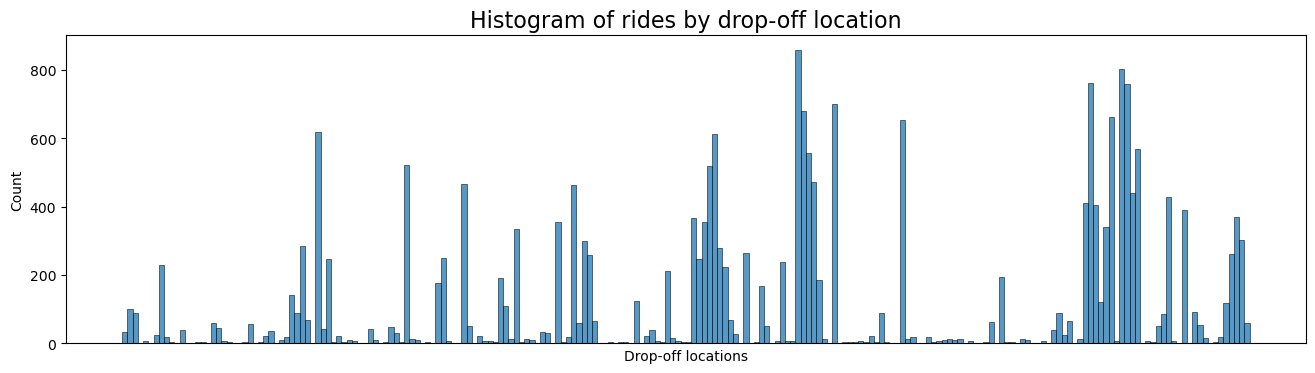

In [70]:
plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

Notice that out of the 200+ drop-off locations, a disproportionate number of locations receive the majority of the traffic, while all the rest get relatively few trips. It's likely that these high-traffic locations are near popular tourist attractions like the Empire State Building or Times Square, airports, and train and bus terminals. However, it would be helpful to know the location that each ID corresponds with. Unfortunately, this is not in the data.

[Learners: insert your response here]

I have learned .... the highest distribution of trip distances are below 5 miles, but there are outliers all the way out to 35 miles. There are no missing values. 

My other questions are .... There are several trips that have a trip distance of "0.0." What might those trips be? Will they impact our model? 

My client would likely want to know ... that the data includes dropoff and pickup times. We can use that information to derive a trip duration for each line of data. This would likely be something that will help the client with their model. 


In [73]:
df['trip_duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

In [74]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,0 days 00:16:43
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,9.0,0.5,0.5,2.06,0.0,0.3,12.36,March,Saturday,0 days 00:08:00
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,47.5,1.0,0.5,9.86,0.0,0.3,59.16,May,Wednesday,0 days 00:59:38
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,16.0,1.0,0.5,1.78,0.0,0.3,19.58,August,Tuesday,0 days 00:21:59
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,9.0,0.0,0.5,0.00,0.0,0.3,9.80,February,Saturday,0 days 00:12:07
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,13.0,0.0,0.5,2.75,0.0,0.3,16.55,November,Friday,0 days 00:20:26




* * With the Exploration Data Aanalysis we get to know the data, understand its outliers, clean its missing values, and prepare it for future modeling.* 

* * With those visualizations we understand that this dataset has some outliers that we will need to make decisions on prior to designing a model.* 


#  Statistical Analysis conducting an A/B Test  

In this project, we will practice using statistics to analyze and interpret data. The activity includes essential concepts like descriptive statistics and hypothesis testing. You will work with the provided data and perform A/B testing and hypothesis testing.

The objective of this project is to demonstrate your ability to prepare, create, and analyze A/B tests. Your A/B test results should aim to identify ways to increase revenue for taxi cab drivers.

Note: For the purpose of this exercise, assume that the sample data comes from an experiment in which customers are randomly selected and divided into two groups: 
1) customers who are required to pay with credit card. 

2) customers who are required to pay with cash. 
Without this assumption, we cannot draw causal conclusions about how payment method affects fare amount.

The goal is to apply descriptive statistics and hypothesis testing in Python. The goal for this A/B test is to sample data and analyze whether there is a relationship between payment type and fare amount. For instance, discover if customers who use credit cards pay higher fare amounts than customers who use cash.

In [78]:
import pandas as pd
from scipy import stats

Data professionals use descriptive statistics for Exploratory Data Analysis. Descriptive statistics are useful because they let you quickly explore and understand large amounts of data. In this case, computing descriptive statistics helps you quickly compare the average total fare amount among different payment types.

# Data Exploration
Use descriptive statistics to conduct Exploratory Data Analysis (EDA).

In the dataset, payment_type is encoded in integers:

1. Credit card
2. Cash
3. No charge
4. Dispute
5. Unknown

In [81]:
# Load dataset into dataframe
taxi_data = df = pd.read_csv(
    "C:/Users/lost4/OneDrive/Documentos/DATA/projects/Coursera Projects/automatidata/2017_Yellow_Taxi_Trip_Data.csv/2017_Yellow_Taxi_Trip_Data.csv", 
    index_col=0
)

In [82]:
# descriptive stats code for EDA
taxi_data.describe(include='all')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


We are interested in the relationship between payment type and the total fare amount the customer pays. One approach is to look at the average total fare amount for each payment type.



In [84]:
taxi_data.groupby('payment_type')['total_amount'].mean()

payment_type
1    17.663577
2    13.545821
3    13.579669
4    11.238261
Name: total_amount, dtype: float64

Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger total fare amount than customers who pay in cash. However, this difference might arise from random sampling, rather than being a true difference in total fare amount. To assess whether the difference is statistically significant, you conduct a hypothesis test.

# Hypothesis Testing


We gonna conduct a hypothesis testing. On the Null hypothesis: There is no difference in the average total fare between customers who use credit cards and those who use cash. Alternative hypothesis: There is a difference in the average total fare between customers who use credit cards and those who use cash.

We gonna conduct a two-sample t-test. Recall the steps for performing a hypothesis test:

1. State the null hypothesis and the alternative hypothesis.
2. Choose a significance level.
3. Calculate the p-value.
4. Decide whether to reject or fail to reject the null hypothesis.


Null hypothesis: There is no difference in the average total fare amount between customers who use credit cards and those who use cash.

Alternative hypothesis: There is a difference in the average total fare amount between customers who use credit cards and those who use cash.

We will use a 5% significance level and proceed with a two-sample t-test.

In [88]:
#hypothesis test, A/B test
#significance level

credit_card = taxi_data[taxi_data['payment_type'] == 1]['total_amount']
cash = taxi_data[taxi_data['payment_type'] == 2]['total_amount']
stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

TtestResult(statistic=20.34644022783838, pvalue=4.5301445359736376e-91, df=19245.398563776336)

import pandas as pd
from scipy import stats

# Sharing our Insights

The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.

This project requires an assumption that passengers were forced to pay one way or the other, and that once informed of this requirement, they always complied with it. The data was not collected this way; so, an assumption had to be made to randomly group data entries to perform an A/B test. This dataset does not account for other likely explanations.For example, riders might not carry lots of cash, so it's easier to pay for longer/farther trips with a credit card. 
In other words, it's far more likely that fare amount determines payment type, rather than vice versa. The difference between average card payment fare and cash fare is inflated, because we use the total amount as the comparing variable. But cash fares all have tip values of $0, while card payments have non-zero values.
A possible reason for this occurance is because cash tips aren't declared. In turn, this means that we capture tips in one group but not in the other. Instead, one could compare the fare_amount column.

# **Regression Analysis: Simplify complex Data Relationships**

As the newest member of the Data Analyst Team on the  consulting firm Automatidata.  We continue the project for their newest client, the NYC Taxi and Limousine Commission (New York City TLC), who wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. On this project i  build the regression model and update the client New York City TLC about your progress.


# Build a Multiple Linear Regression Model

In this activity, we build a multiple linear regression model. Multiple linear regression helps the team estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

## Imports and Loading
Import the packages that you've learned are needed for building linear regression models.

In [96]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [313]:
# Load dataset into dataframe
taxi_data = df = pd.read_csv(
    "C:/Users/lost4/OneDrive/Documentos/DATA/projects/Coursera Projects/automatidata/2017_Yellow_Taxi_Trip_Data.csv/2017_Yellow_Taxi_Trip_Data.csv", 
    index_col=0
)

# Create a backup of the original dataframe
df0 = df.copy()

# Now, you can work with df, and revert to df0 if needed


In [98]:
# Keep `df0` as the original dataframe and create a copy (df) where changes will go
# Can revert `df` to `df0` if needed down the line
df = df0.copy()

# Display the dataset's shape
print(df.shape)

# Display basic info about the dataset
df.info()

(22699, 17)
<class 'pandas.core.frame.DataFrame'>
Index: 22699 entries, 24870114 to 17208911
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22699 non-null  int64  
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   trip_distance          22699 non-null  float64
 5   RatecodeID             22699 non-null  int64  
 6   store_and_fwd_flag     22699 non-null  object 
 7   PULocationID           22699 non-null  int64  
 8   DOLocationID           22699 non-null  int64  
 9   payment_type           22699 non-null  int64  
 10  fare_amount            22699 non-null  float64
 11  extra                  22699 non-null  float64
 12  mta_tax                22699 non-null  float64
 13  tip_amount             22699 non-null  float64
 14  tolls_amount           22699 non-null

In [99]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()

# Check for duplicates
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

# Check for missing values in dataframe
print('Total count of missing values:', df.isna().sum().sum())

# Display missing values per column in dataframe
print('Missing values per column:')
df.isna().sum()

Shape of dataframe: (22699, 17)
Shape of dataframe with duplicates dropped: (22699, 17)
Total count of missing values: 0
Missing values per column:


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [100]:
# Display descriptive stats about the data
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [136]:
# Check the format of the data using .iloc to access by position
df['tpep_dropoff_datetime'].iloc[0] 

Timestamp('2017-03-25 09:09:47')

In [138]:
# Reset index to default integer index
df.reset_index(drop=True, inplace=True)

# Now you can access the first element using the integer index
df['tpep_dropoff_datetime'][0]


Timestamp('2017-03-25 09:09:47')

In [140]:
# Convert datetime columns to datetime
# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

# Convert `tpep_pickup_datetime` to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Convert `tpep_dropoff_datetime` to datetime format
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

df.head(3)

Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]
Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75


Create a duration column 

In [142]:
# Create `duration` column
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22699 non-null  int64         
 1   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 3   passenger_count        22699 non-null  int64         
 4   trip_distance          22699 non-null  float64       
 5   RatecodeID             22699 non-null  int64         
 6   store_and_fwd_flag     22699 non-null  object        
 7   PULocationID           22699 non-null  int64         
 8   DOLocationID           22699 non-null  int64         
 9   payment_type           22699 non-null  int64         
 10  fare_amount            22699 non-null  float64       
 11  extra                  22699 non-null  float64       
 12  mta_tax                22699 non-null  float64       
 13  t

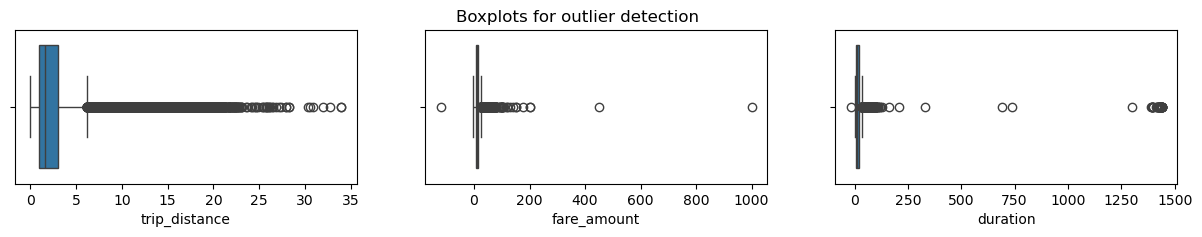

In [146]:
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])
plt.show();

In [176]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

In [180]:
# List of columns to drop
columns_to_drop = ['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
                   'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
                   'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
                   'total_amount', 'duration', 'pickup_dropoff', 'day', 'month']

# Filter the list to include only columns that exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop the columns
df2 = df.drop(columns=columns_to_drop)

# Check the remaining columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 532.1 KB


In [190]:
df2 = df.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'duration', 'pickup_dropoff', 'day', 'month'
              ], axis=1, errors='ignore')

# Check the remaining columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 532.1 KB


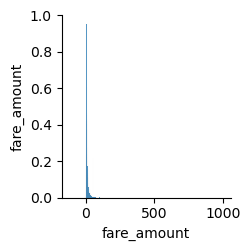

In [194]:
# Adjust pairplot to include only columns that exist in df2
available_columns = ['fare_amount', 'mean_duration', 'mean_distance']
available_columns = [col for col in available_columns if col in df2.columns]

sns.pairplot(df2[available_columns],
             plot_kws={'alpha':0.4, 'size':5});


In [210]:
# Create correlation matrix containing pairwise correlation of columns, using pearson correlation coefficient
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount
VendorID,1.000000,0.266463,-0.000599
passenger_count,0.266463,1.000000,0.010614
fare_amount,-0.000599,0.010614,1.000000


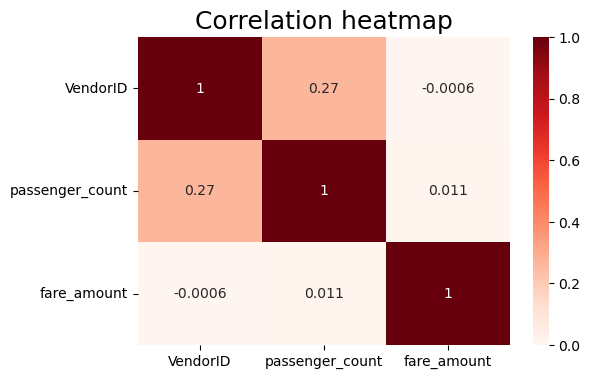

In [212]:
# Create correlation heatmap

plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

mean_duration and mean_distance are both highly correlated with the target variable of fare_amount They're also both correlated with each other, with a Pearson correlation of 0.87.

Highly correlated predictor variables can be bad for linear regression models when you want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about the data.

This model will predict fare_amount, which will be used as a predictor variable in machine learning models. Therefore, I try modeling with both variables even though they are correlated.

In [214]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 532.1 KB


In [216]:
# Remove the target column from the features
X = df2.drop(columns=['fare_amount'])

# Set y variable
y = df2[['fare_amount']]

# Display first few rows
X.head()

,VendorID,passenger_count
0,2,6
1,1,1
2,1,1
3,2,1
4,2,1


In [218]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,VendorID_2
0,6,True
1,1,False
2,1,False
3,1,True
4,1,True


In [222]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Standardize the data
I use StandardScaler(), fit(), and transform() to standardize the X_train variables.

In [224]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.50301524  0.89286563]
 [-0.50301524  0.89286563]
 [ 0.27331093 -1.11998936]
 ...
 [-0.50301524 -1.11998936]
 [-0.50301524 -1.11998936]
 [ 1.82596329  0.89286563]]


In [226]:
# Fit the model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [228]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 9.524159744422889e-05
R^2: 9.524159744422889e-05
MAE: 7.375566727154228
MSE: 189.79161782323808
RMSE: 13.776487862413921


In [230]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [232]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 6.684838002612992e-05
R^2: 6.684838002612992e-05
MAE: 7.165286723699437
MSE: 117.70550277257163
RMSE: 10.849216689354657


The model performance is high on both training and test sets, suggesting that there is no bias in the model and that the model is not overfit. In fact, the test scores were somewhat better.

For the test data, an R2 of 0.868 means that 86.8% of the variance in the fare_amount variable is described by the model.

The mean absolute error is informative here because, for the purposes of the model, an error of two is not more than twice as bad as an error of one.

In [234]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.885685,1.114315
18134,28.0,12.885685,15.114315
4655,5.5,12.977019,-7.477019
7378,15.5,12.885685,2.614315
13914,9.5,13.185644,-3.685644


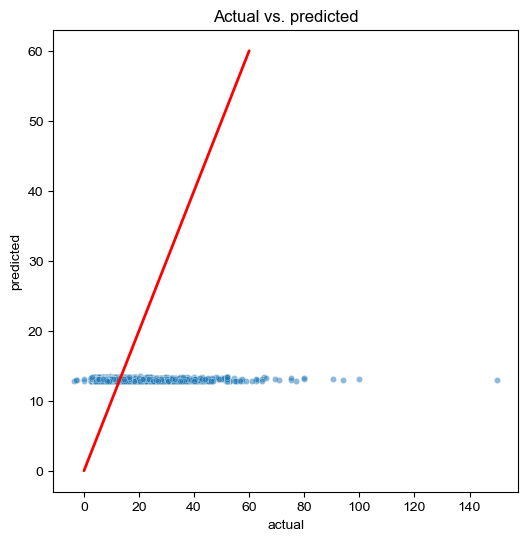

In [236]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

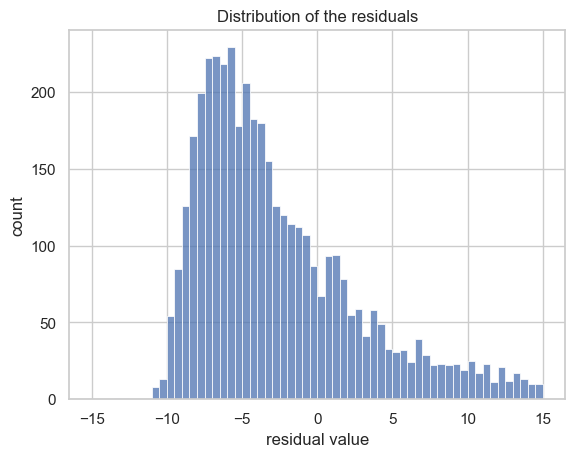

In [238]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [240]:
results['residual'].mean()

-0.05150395149624398

The distribution of the residuals is normal and has a mean of -0.015. The residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution around zero is good, as it demonstrates that the models errors are evenly distributed and unbiased.

I create a scatterplot of residuals over predicted.

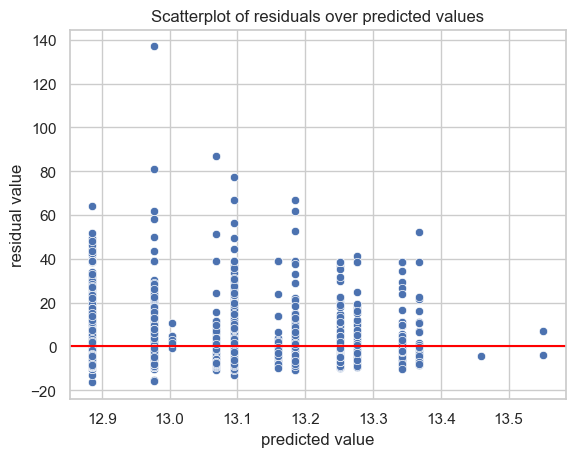

In [242]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

 The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper-left corner to the lower-right corner, which I know are the imputed maximum of $62.50 and the flat rate of \$52 for JFK airport trips.

In [268]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,VendorID_2
0,0.11765,-0.103646


The coefficients reveal that mean_distance was the feature with the greatest weight in the model's final prediction. A common misinterpretation is that for every mile traveled, the fare amount increases by a mean of $7.13. This is incorrect. The data used to train the model was standardized with `StandardScaler()`. As such, the units are no longer miles. In other words, I cannot say "for every mile traveled...", as stated above. The correct interpretation of this coefficient is: controlling for other variables, *for every +1 change in standard deviation*, the fare amount increases by a mean of \$7.13.

Because some highly correlated features were not removed, the confidence interval of this assessment is wider.

The standard deviation of mean_distance in the X_train data.

I divide the coefficient (7.133867) by the result to yield a more intuitive interpretation.

## Predict on the Full Dataset

In [335]:
y_preds_full = lr.predict(X_scaled)

The data dictionary says that the RatecodeID column captures the following information:
. = standard rat
e. = JFK (airport
). = Newark (airport
). = Nassau or Westcheste
r. = Negotiated far
e. = Group ride

This means that some fares don't need to be predicted. They can simply be imputed based on their rate code. Specifically, all rate codes of 2 can be imputed with $52, as this is a flat rate for JFK airport.

The other rate codes have some variation (not shown here, but feel free to check for yourself). They are not a fixed rate, so these fares will remain unto
Impute 52 at all predictions where RatecodeID is 2.uched.

In [338]:
# Create a new df containing just the RatecodeID col from the whole dataset
final_preds = df[['RatecodeID']].copy()

# Add a column containing all the predictions
final_preds['y_preds_full'] = y_preds_full

# Impute a prediction of 52 at all rows where RatecodeID == 2
final_preds.loc[final_preds['RatecodeID']==2, 'y_preds_full'] = 52

# Check that it worked
final_preds[final_preds['RatecodeID']==2].head()

,RatecodeID,y_preds_full
18600059,2,52.0
47959795,2,52.0
95729204,2,52.0
103404868,2,52.0
80479432,2,52.0


 Check performance on full dataset

In [340]:
final_preds = final_preds['y_preds_full']
print('R^2:', r2_score(y, final_preds))
print('MAE:', mean_absolute_error(y, final_preds))
print('MSE:', mean_squared_error(y, final_preds))
print('RMSE:',np.sqrt(mean_squared_error(y, final_preds)))

R^2: 0.19571289584297835
MAE: 6.45294545312156
MSE: 141.0641244145405
RMSE: 11.877041905059546



## **Analysis**

In this stage, we gonna  consider if the following question where applicable to complete the code response:

1.   Outliers and extreme data values can significantly impact linear regression equations. After visualizing data, we make a plan for addressing outliers by dropping rows, substituting extreme data with average data, and/or removing data values greater than 3 standard deviations.

2.   EDA activities also include identifying missing data to help the analyst make decisions on their exclusion or inclusion by substituting values with data set means, medians, and other similar methods.

3.   It's important to check for things like multicollinearity between predictor variables, as well to understand their distributions, as this will help you decide what statistical inferences can be made from the model and which ones cannot.

4.  Additionally, it can be useful to engineer new features by multiplying variables together or taking the difference from one variable to another. For example, in this dataset you can create a `duration` variable by subtracting `tpep_dropoff` from `tpep_pickup time`.
5.  Multiple linear regression is a powerful tool to estimate a dependent continous variable from several independent variables.
6. Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
7. Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model while maintaining model assumptions (or not, depending on your use case).
8. A test set is supposed to represent entirely new data that the model has not seen before, but in this case, some of its predictor variables were derived using data that was in the test set. This is known as data leakage. Data leakage is when information from your training data contaminates the test data. If your model has unexpectedly high scores, there is a good chance that there was some data leakage. To avoid data leakage in this modeling process, it would be best to compute the means using only the training set and then copy those into the test set, thus preventing values from the test set from being included in the computation of the means.
9. This would have created some problems because it's very likely that some combinations of pickup-dropoff locations would only appear in the test data (not the train data). This means that there would be NaNs in the test data, and further steps would be required to address this. In this case, the data leakage improved the R2 score by ~0.03.
10. Imputing the fare amount for RatecodeID 2 after training the model and then calculating model performance metrics on the post-imputed data is not best practice. It would be better to separate the rides that did not have rate codes of 2, train the model on that data specifically, and then add the RatecodeID 2 data (and its imputed rates) after. This would prevent training the model on data that you don't need a model for, and would likely result in a better final model. However, the steps were combined for simplicity.
11. Models that predict values to be used in another downstream model are common in data science workflows. When models are deployed, the data cleaning, imputations, splits, predictions, etc. are done using modeling pipelines. Pandas was used here to granularize and explain the concepts of certain steps, but this process would be streamlined by machine learning engineers. The ideas are the same, but the implementation would differ. Once a modeling workflow has been validated, the entire process can be automated, often with no need for pandas and no need to examine outputs at each step. This entire process would be reduced to a page of code.e.